In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Activation, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, MaxPooling2D
from keras_preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 1
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2022-08-11 21:44:04--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip’

cats_and_dogs.zip   100%[===================>]  67,43M  11,3MB/s    in 6,3s    

2022-08-11 21:44:11 (10,7 MB/s) - ‘cats_and_dogs.zip’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
   creating: cats_and_dogs/
  inflating: cats_and_dogs/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cats_and_dogs/
  inflating: __MACOSX/cats_and_dogs/._.DS_Store  
   creating: cats_and_dogs/test/
  inflating: cats_and_dogs/test/48.jpg  
   creating: __MACOSX/cats_and_dogs/test/
  inflating: __MACOSX/cats_and_dogs/test/._48.jpg  
  inflating: cats_and_dogs/test/49.jpg  
  inflating: __MACOSX/cats_and_dogs/test/._49.jpg  
  inflat

  inflating: cats_and_dogs/train/dogs/dog.986.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.986.jpg  
  inflating: cats_and_dogs/train/dogs/dog.992.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.992.jpg  
  inflating: cats_and_dogs/train/dogs/dog.979.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.979.jpg  
  inflating: cats_and_dogs/train/dogs/dog.945.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.945.jpg  
  inflating: cats_and_dogs/train/dogs/dog.789.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.789.jpg  
  inflating: cats_and_dogs/train/dogs/dog.951.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.951.jpg  
  inflating: cats_and_dogs/train/dogs/dog.206.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.206.jpg  
  inflating: cats_and_dogs/train/dogs/dog.560.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.560.jpg  
  inflating: cats_and_dogs/train/dogs/dog.574.jpg  
  inflating: __MACOSX/cats_a

  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.406.jpg  
  inflating: cats_and_dogs/train/dogs/dog.360.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.360.jpg  
  inflating: cats_and_dogs/train/dogs/dog.374.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.374.jpg  
  inflating: cats_and_dogs/train/dogs/dog.412.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.412.jpg  
  inflating: cats_and_dogs/train/dogs/dog.638.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.638.jpg  
  inflating: cats_and_dogs/train/dogs/dog.33.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.33.jpg  
  inflating: cats_and_dogs/train/dogs/dog.27.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.27.jpg  
  inflating: cats_and_dogs/train/dogs/dog.162.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.162.jpg  
  inflating: cats_and_dogs/train/dogs/dog.604.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.604.jpg  
  inflating: cats_and

  inflating: cats_and_dogs/train/dogs/dog.853.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.853.jpg  
  inflating: cats_and_dogs/train/dogs/dog.80.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.80.jpg  
  inflating: cats_and_dogs/train/dogs/dog.884.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.884.jpg  
  inflating: cats_and_dogs/train/dogs/dog.57.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.57.jpg  
  inflating: cats_and_dogs/train/dogs/dog.43.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.43.jpg  
  inflating: cats_and_dogs/train/dogs/dog.3.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.3.jpg  
  inflating: cats_and_dogs/train/dogs/dog.890.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.890.jpg  
  inflating: cats_and_dogs/train/dogs/dog.648.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.648.jpg  
  inflating: cats_and_dogs/train/dogs/dog.660.jpg  
  inflating: __MACOSX/cats_and_dogs/tr

  inflating: cats_and_dogs/train/dogs/dog.673.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.673.jpg  
  inflating: cats_and_dogs/train/dogs/dog.840.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.840.jpg  
  inflating: cats_and_dogs/train/dogs/dog.698.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.698.jpg  
  inflating: cats_and_dogs/train/dogs/dog.93.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.93.jpg  
  inflating: cats_and_dogs/train/dogs/dog.87.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.87.jpg  
  inflating: cats_and_dogs/train/dogs/dog.854.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.854.jpg  
  inflating: cats_and_dogs/train/dogs/dog.868.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.868.jpg  
  inflating: cats_and_dogs/train/dogs/dog.869.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.869.jpg  
  inflating: cats_and_dogs/train/dogs/dog.855.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: cats_and_dogs/train/dogs/dog.872.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.872.jpg  
  inflating: cats_and_dogs/train/dogs/dog.89.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.89.jpg  
  inflating: cats_and_dogs/train/dogs/dog.682.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.682.jpg  
  inflating: cats_and_dogs/train/dogs/dog.696.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.696.jpg  
  inflating: cats_and_dogs/train/dogs/dog.76.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.76.jpg  
  inflating: cats_and_dogs/train/dogs/dog.669.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.669.jpg  
  inflating: cats_and_dogs/train/dogs/dog.62.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.62.jpg  
  inflating: cats_and_dogs/train/dogs/dog.899.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.899.jpg  
  inflating: cats_and_dogs/train/dogs/dog.641.jpg  
  inflating: __MACOSX/cats_and_dog

  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.874.jpg  
  inflating: cats_and_dogs/train/dogs/dog.860.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.860.jpg  
  inflating: cats_and_dogs/train/dogs/dog.135.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.135.jpg  
  inflating: cats_and_dogs/train/dogs/dog.58.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.58.jpg  
  inflating: cats_and_dogs/train/dogs/dog.653.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.653.jpg  
  inflating: cats_and_dogs/train/dogs/dog.647.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.647.jpg  
  inflating: cats_and_dogs/train/dogs/dog.121.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.121.jpg  
  inflating: cats_and_dogs/train/dogs/dog.109.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.109.jpg  
  inflating: cats_and_dogs/train/dogs/dog.64.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.64.jpg  
  inflating: cats_and

  inflating: cats_and_dogs/train/dogs/dog.144.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.144.jpg  
  inflating: cats_and_dogs/train/dogs/dog.29.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.29.jpg  
  inflating: cats_and_dogs/train/dogs/dog.622.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.622.jpg  
  inflating: cats_and_dogs/train/dogs/dog.636.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.636.jpg  
  inflating: cats_and_dogs/train/dogs/dog.150.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.150.jpg  
  inflating: cats_and_dogs/train/dogs/dog.385.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.385.jpg  
  inflating: cats_and_dogs/train/dogs/dog.391.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.391.jpg  
  inflating: cats_and_dogs/train/dogs/dog.408.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.408.jpg  
  inflating: cats_and_dogs/train/dogs/dog.420.jpg  
  inflating: __MACOSX/cats_and

  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.977.jpg  
  inflating: cats_and_dogs/train/dogs/dog.744.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.744.jpg  
  inflating: cats_and_dogs/train/dogs/dog.750.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.750.jpg  
  inflating: cats_and_dogs/train/dogs/dog.988.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.988.jpg  
  inflating: cats_and_dogs/train/dogs/dog.778.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.778.jpg  
  inflating: __MACOSX/cats_and_dogs/train/._dogs  
   creating: cats_and_dogs/train/cats/
  inflating: cats_and_dogs/train/cats/cat.952.jpg  
   creating: __MACOSX/cats_and_dogs/train/cats/
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.952.jpg  
  inflating: cats_and_dogs/train/cats/cat.946.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.946.jpg  
  inflating: cats_and_dogs/train/cats/cat.6.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.6.jpg 

  inflating: cats_and_dogs/train/cats/cat.161.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.161.jpg  
  inflating: cats_and_dogs/train/cats/cat.607.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.607.jpg  
  inflating: cats_and_dogs/train/cats/cat.22.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.22.jpg  
  inflating: cats_and_dogs/train/cats/cat.149.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.149.jpg  
  inflating: cats_and_dogs/train/cats/cat.36.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.36.jpg  
  inflating: cats_and_dogs/train/cats/cat.37.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.37.jpg  
  inflating: cats_and_dogs/train/cats/cat.148.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.148.jpg  
  inflating: cats_and_dogs/train/cats/cat.23.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.23.jpg  
  inflating: cats_and_dogs/train/cats/cat.160.jpg  
  inflating: __MACOSX/cats_and_dogs/

  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.932.jpg  
  inflating: cats_and_dogs/train/cats/cat.729.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.729.jpg  
  inflating: cats_and_dogs/train/cats/cat.701.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.701.jpg  
  inflating: cats_and_dogs/train/cats/cat.715.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.715.jpg  
  inflating: cats_and_dogs/train/cats/cat.259.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.259.jpg  
  inflating: cats_and_dogs/train/cats/cat.265.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.265.jpg  
  inflating: cats_and_dogs/train/cats/cat.503.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.503.jpg  
  inflating: cats_and_dogs/train/cats/cat.517.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.517.jpg  
  inflating: cats_and_dogs/train/cats/cat.271.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.271.jpg  
  inflating: cats

  inflating: cats_and_dogs/train/cats/cat.56.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.56.jpg  
  inflating: cats_and_dogs/train/cats/cat.883.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.883.jpg  
  inflating: cats_and_dogs/train/cats/cat.897.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.897.jpg  
  inflating: cats_and_dogs/train/cats/cat.42.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.42.jpg  
  inflating: cats_and_dogs/train/cats/cat.129.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.129.jpg  
  inflating: cats_and_dogs/train/cats/cat.896.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.896.jpg  
  inflating: cats_and_dogs/train/cats/cat.128.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.128.jpg  
  inflating: cats_and_dogs/train/cats/cat.43.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.43.jpg  
  inflating: cats_and_dogs/train/cats/cat.57.jpg  
  inflating: __MACOSX/cats_and_dogs

  inflating: cats_and_dogs/train/cats/cat.912.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.912.jpg  
  inflating: cats_and_dogs/train/cats/cat.906.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.906.jpg  
  inflating: cats_and_dogs/train/cats/cat.902.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.902.jpg  
  inflating: cats_and_dogs/train/cats/cat.916.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.916.jpg  
  inflating: cats_and_dogs/train/cats/cat.725.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.725.jpg  
  inflating: cats_and_dogs/train/cats/cat.731.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.731.jpg  
  inflating: cats_and_dogs/train/cats/cat.719.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.719.jpg  
  inflating: cats_and_dogs/train/cats/cat.282.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.282.jpg  
  inflating: cats_and_dogs/train/cats/cat.296.jpg  
  inflating: __MACOSX/cats_a

  inflating: cats_and_dogs/train/cats/cat.378.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.378.jpg  
  inflating: cats_and_dogs/train/cats/cat.422.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.422.jpg  
  inflating: cats_and_dogs/train/cats/cat.344.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.344.jpg  
  inflating: cats_and_dogs/train/cats/cat.350.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.350.jpg  
  inflating: cats_and_dogs/train/cats/cat.436.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.436.jpg  
  inflating: cats_and_dogs/train/cats/cat.807.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.807.jpg  
  inflating: cats_and_dogs/train/cats/cat.813.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.813.jpg  
  inflating: cats_and_dogs/train/cats/cat.185.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.185.jpg  
  inflating: cats_and_dogs/train/cats/cat.191.jpg  
  inflating: __MACOSX/cats_a

  inflating: cats_and_dogs/train/cats/cat.431.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.431.jpg  
  inflating: cats_and_dogs/train/cats/cat.380.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.380.jpg  
  inflating: cats_and_dogs/train/cats/cat.394.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.394.jpg  
  inflating: cats_and_dogs/train/cats/cat.579.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.579.jpg  
  inflating: cats_and_dogs/train/cats/cat.551.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.551.jpg  
  inflating: cats_and_dogs/train/cats/cat.237.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.237.jpg  
  inflating: cats_and_dogs/train/cats/cat.223.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.223.jpg  
  inflating: cats_and_dogs/train/cats/cat.545.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.545.jpg  
  inflating: cats_and_dogs/train/cats/cat.592.jpg  
  inflating: __MACOSX/cats_a

  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2472.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2328.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2328.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2499.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2499.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2498.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2498.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2329.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2329.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2315.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2315.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2473.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2473.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2467.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2467.jpg  
  inflating: cats_and_dogs/validation/dogs

  inflating: cats_and_dogs/validation/dogs/dog.2163.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2163.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2177.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2177.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2017.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2017.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2003.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2003.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2229.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2229.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2215.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2215.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2201.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2201.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2218.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/.

  inflating: cats_and_dogs/validation/dogs/dog.2092.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2092.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2119.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2119.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2131.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2131.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2125.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2125.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2469.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2469.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2333.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2333.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2455.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2455.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2441.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/.

  inflating: cats_and_dogs/validation/cats/cat.2491.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2491.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2485.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2485.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2136.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2136.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2122.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2122.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2123.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2123.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2137.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2137.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2484.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2484.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2490.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/.

  inflating: cats_and_dogs/validation/cats/cat.2022.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2022.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2208.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2208.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2234.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2234.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2220.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2220.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2368.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2368.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2426.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2426.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2340.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2340.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2354.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/.

  inflating: cats_and_dogs/validation/cats/cat.2370.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2370.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2358.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2358.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2166.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2166.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2172.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2172.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2199.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2199.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2198.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2198.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2173.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2173.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2167.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/.

  inflating: cats_and_dogs/validation/cats/cat.2074.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2074.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2060.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2060.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2276.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2276.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2262.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2262.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2289.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2289.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2458.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2458.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2302.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2302.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2464.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/.

In [3]:
!rm cats_and_dogs.zip
!rm -rf __MACOSX
PATH = 'cats_and_dogs'

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
train_dir      = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir       = os.path.join(PATH, 'test')

# -1 because of DS_Store
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])-1
total_val   = sum([len(files) for r, d, files in os.walk(validation_dir)])-1
total_test  = len(os.listdir(test_dir))-1

print('Train:', total_train) 
print('Validation:', total_val)
print('Test:', total_test)

Train: 2000
Validation: 1000
Test: 50


In [4]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
train_image_generator      = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator       = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory('cats_and_dogs/train', batch_size = batch_size, target_size =(IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')
val_data_gen = validation_image_generator.flow_from_directory('cats_and_dogs/validation', batch_size = batch_size, target_size =(IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')
test_data_gen = test_image_generator.flow_from_directory('cats_and_dogs/test', batch_size = batch_size, target_size =(IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary', classes = ['.'], shuffle = False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


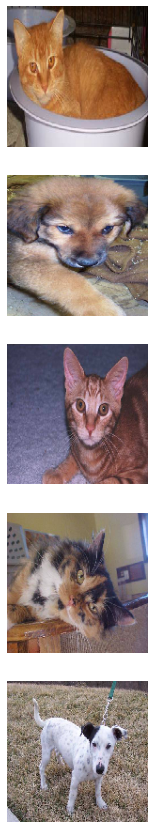

In [6]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           horizontal_flip=True,
                                           rotation_range=20,
                                           zoom_range=0.15,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.15,
                                           fill_mode="nearest")


Found 2000 images belonging to 2 classes.


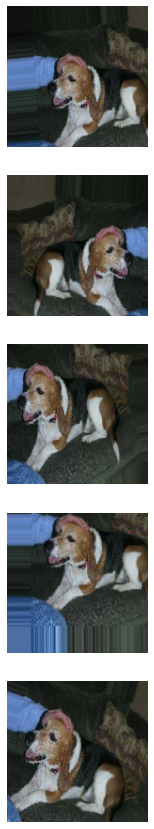

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [10]:
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])



model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [18]:
history = model.fit(train_data_gen, steps_per_epoch=8, epochs=epochs, validation_data=val_data_gen, validation_steps=8, verbose=1)

Epoch 1/15
8/8 [==============================] - 54s 7s/step - loss: 2.1659 - accuracy: 0.5313 - val_loss: 0.7161 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 40s 5s/step - loss: 0.7097 - accuracy: 0.4921 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 38s 5s/step - loss: 0.6916 - accuracy: 0.5047 - val_loss: 0.6873 - val_accuracy: 0.5140
Epoch 4/15
8/8 [==============================] - 39s 5s/step - loss: 0.6889 - accuracy: 0.5329 - val_loss: 0.6808 - val_accuracy: 0.5240
Epoch 5/15
8/8 [==============================] - 52s 7s/step - loss: 0.6827 - accuracy: 0.5204 - val_loss: 0.6748 - val_accuracy: 0.5310
Epoch 6/15
8/8 [==============================] - 51s 6s/step - loss: 0.6752 - accuracy: 0.5619 - val_loss: 0.6607 - val_accuracy: 0.5690
Epoch 7/15
8/8 [==============================] - 47s 6s/step - loss: 0.6671 - accuracy: 0.5771 - val_loss: 0.6600 - val_accuracy: 0.6110
Epoch 8/15
8/8 [==================

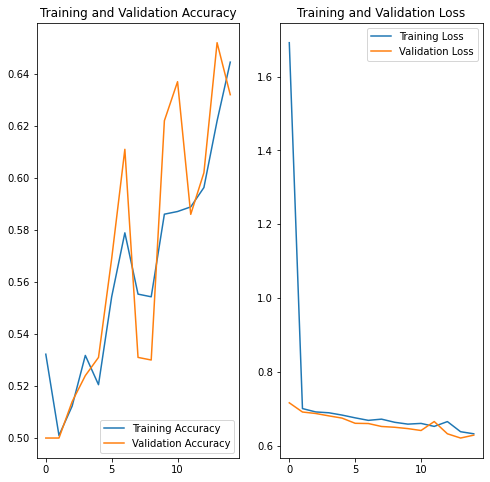

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

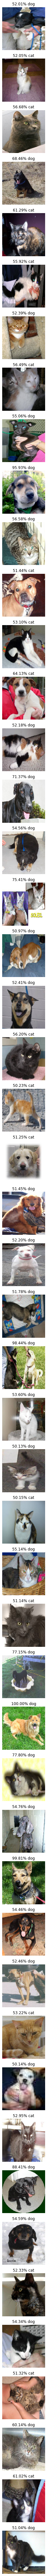

In [21]:
probabilities = model.predict(test_data_gen)[:,1]
plotImages(test_data_gen[0][0], probabilities = probabilities)

In [22]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.72% of the images of cats and dogs.
You passed the challenge!
